<a href="https://colab.research.google.com/github/wenjie-hoo/Uni_stuff/blob/main/Evolutionary_Algorithm/l2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SGA-PMX Demo  

  This script presents an example implementation of the Simple Genetic Algorithm (SGA) with the PMX operator and its application to solving the Travelling Salesman Problem (TSP). Popular instances of the TSP problem can be found in the TSPLib library [1]. The script focuses on solving the BERLIN52 instance, in order to solve other instances it may be necessary to change the settings of the algorithm parameters and perhaps the evolutionary operators.  

Literature: [1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/



In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import requests
import time
from matplotlib.lines import Line2D
%matplotlib inline

In [2]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


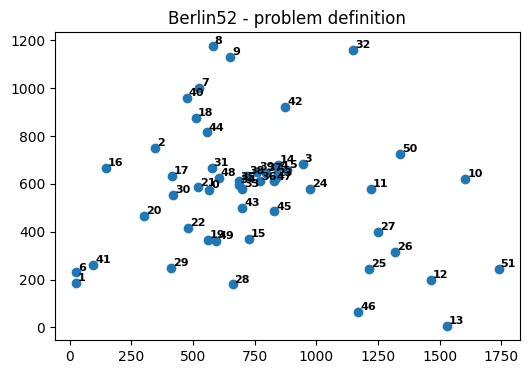

In [3]:
plt.figure(figsize=(6,4))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

<Figure size 600x400 with 0 Axes>

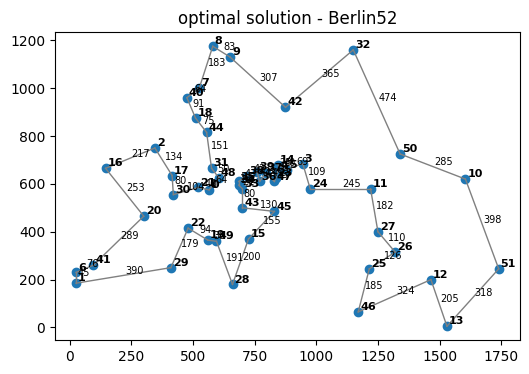

In [4]:
def plot_route(title, route):
    route = route
    plt.figure(figsize=(6,4))
    fig, ax = plt.subplots(figsize=(6,4))

    plt.plot(coords[:, 0], coords[:, 1], 'o')

    for i in range(n):
        plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

    ax.add_line(Line2D(
        [coords[0, 0], coords[route[0], 0]],
        [coords[0, 1], coords[route[0], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
            (coords[0, 1] + coords[route[0], 1])/2 + 6,
            '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
    for i in range(1, len(route)):
        ax.add_line(Line2D(
            [coords[route[i-1], 0], coords[route[i], 0]],
            [coords[route[i-1], 1], coords[route[i], 1]],
            linewidth=1, color='gray'))
        plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
                (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
                '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
    ax.add_line(Line2D(
        [coords[route[-1], 0], coords[0, 0]],
        [coords[route[-1], 1], coords[0, 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
            (coords[route[-1], 1] + coords[0, 1])/2 + 6,
            '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

    plt.title('optimal solution - ' + title)

    plt.show()
plot_route('Berlin52', p)

### Objective function

In [5]:
def tsp_objective_function(p,A):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

### Random Sampling

In [6]:
def random_sampling():
    t0 = time.time()

    T = 1000000

    permutations = np.empty((T, n), dtype=np.int64)
    costs = np.zeros(T)
    for i in range(T):
        permutations[i, :] = np.random.permutation(n)
        costs[i] = tsp_objective_function(permutations[i, :],A)
    time1 = time.time() - t0
    p = permutations[costs.argmin(), :]

    # print(tsp_objective_function(p), p)
    return tsp_objective_function(p, A), costs, time1

_ , costs_rs, t_rs = random_sampling()

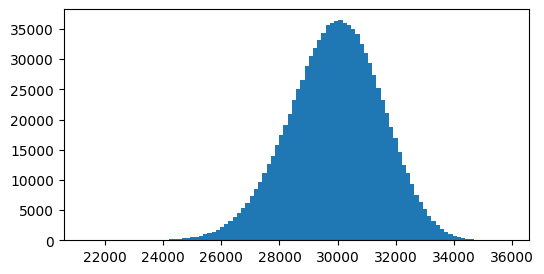

29914.173918491586 1579.5980712190026


In [7]:
plt.figure(figsize=(6,3))
plt.hist(costs_rs, bins=100)
plt.show()

print(costs_rs.mean(), costs_rs.std())

### Simulated Annealing

In [8]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [9]:
def simulated_annealing(T = 500000, radius = 1 ,alpha = 1.0):
    t0 = time.time()
    p = np.random.permutation(n)
    p_cost = tsp_objective_function(p , A)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = tsp_objective_function(q , A )
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost
    time1 = time.time() - t0
    return p_cost, costs, time1

p_cost_sa, costs_sa, t_sa = simulated_annealing()
print(p_cost_sa, costs_sa.min(), t_sa)

9707.04475261099 9707.04475261099 38.9169762134552


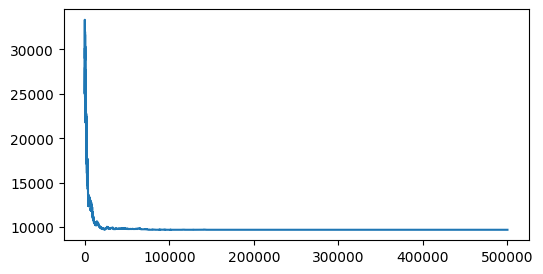

In [10]:
plt.figure(figsize=(6,3))
plt.plot(costs_sa)
plt.show()

### SGA-PMX

### (a) complete the script with the removed implementation of the PMX operator,
https://observablehq.com/@swissmanu/pmx-crossover

In [11]:
def PMX(ind1, ind2):
    i, j = np.sort(np.random.choice(len(ind1), 2, replace=False))

    p1, p2 = ind1[i:j+1], ind2[i:j+1]
    mapping_ind1 = {p1[k]: p2[k] for k in range(len(p1))}
    mapping_ind2 = {p2[k]: p1[k] for k in range(len(p2))}

    child1, child2 = ind1.copy(), ind2.copy()

    child1[i:j+1], child2[i:j+1] = p2, p1

    for k in range(i):
        while child1[k] in mapping_ind2:
            child1[k] = mapping_ind2[child1[k]]
        while child2[k] in mapping_ind1:
            child2[k] = mapping_ind1[child2[k]]

    for k in range(j+1, len(ind1)):
        while child1[k] in mapping_ind2:
            child1[k] = mapping_ind2[child1[k]]
        while child2[k] in mapping_ind1:
            child2[k] = mapping_ind1[child2[k]]

    return child1, child2


In [12]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [16]:
def SGA(
    population_size = 1000,
    chromosome_length = n,
    crossover_probability = 0.95,
    mutation_probability = 0.25,
    number_of_iterations = 250,
    mutation = reverse_sequence_mutation,
    dist_matrix = A,
    objective_function = tsp_objective_function,
    crossover = PMX,
    log = False,
    optimal_solution = None
):
    time0 = time.time()
    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    number_of_offspring = population_size

    cost_values = []

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = objective_function(current_population[i, :], dist_matrix)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = crossover(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = mutation(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = objective_function(children_population[i, :], dist_matrix)

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        cost_values.append([objective_values.min(), objective_values.mean(), objective_values.max()])
        if best_objective_value > objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]
        time_SGA = time.time() - time0
        if t%20==0 and log==True:
            print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
            if objective_values.std() == 0:
              return cost_values, best_objective_value, best_chromosome, current_population, time_SGA
            if optimal_solution == objective_values.min():
              return cost_values, best_objective_value, best_chromosome, current_population, time_SGA
    return cost_values, best_objective_value, best_chromosome, current_population, time_SGA

In [17]:
cost_values, best_objective_value, best_chromosom, current_population, time_SGA= SGA(
    population_size=1000, mutation_probability=0.2, crossover_probability=0.95,log=True)

  0     0.09540796 24373.34092109 28569.50159923 29831.43102103 967.15732098
 20     1.41088319 16200.06563537 18227.60734666 18780.70921807 392.62578227
 40     2.71119332 12712.25602185 13318.40305019 13530.44554365 158.12282876
 60     4.90725517 9674.80909247 10059.95398897 10143.96613576  81.47544336
 80     7.08226609 8766.90665114 8997.11085521 9004.99787912  23.63153810
100     8.22095180 8289.79110852 8345.70575083 8364.21275522  18.54379664
120     9.35151052 8238.08750555 8238.08750555 8238.08750555   0.00000000


<Figure size 600x400 with 0 Axes>

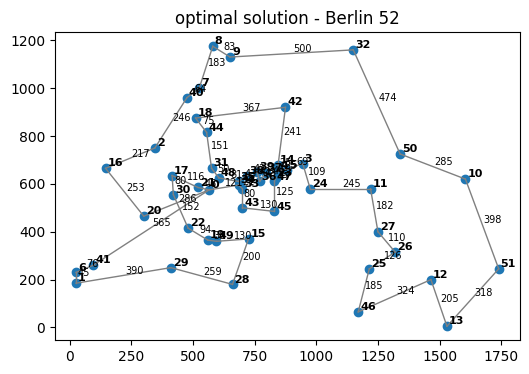

In [18]:
plot_route('Berlin 52' ,current_population[0])

### b) run the script for an instance of Berlin52 and compare the results of the three placed methods of solving the problem (repeat the calculations several times),

In [19]:
rs_data = []
sa_data = []
sga_data = []

In [22]:
for i in range(10):
    p_cost, costs_rs, t_rs = random_sampling()
    rs_data.append([p_cost, costs_rs, t_rs])
    p_cost_sa, costs_sa, t_sa = simulated_annealing()
    sa_data.append([p_cost_sa, costs_sa, t_sa])
    cost_values, best_objective_value, _, _, t_SGA= SGA(log=False)
    sga_data.append([best_objective_value, cost_values, t_SGA])
# it takes a while

RS avg time: 37.302622771263124
SA avg time: 40.06573235988617
SGA avg time: 18.36448109149933


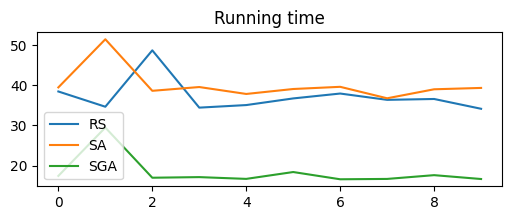

In [23]:
t_rs = [l[2] for l in rs_data]
t_sa = [l[2] for l in sa_data]
t_SGA = [l[2] for l in sga_data]
print(f'RS avg time: {sum(t_rs)/10}')
print(f'SA avg time: {sum(t_sa)/10}')
print(f'SGA avg time: {sum(t_SGA)/10}')
plt.figure(figsize=(6, 2))
plt.plot(t_rs, label='RS')
plt.plot(t_sa, label='SA')
plt.plot(t_SGA, label='SGA')
plt.title('Running time')
plt.legend()
plt.show()

RS min cost: 20230.538627718463
SA min cost: 8529.024956138772
SGA min cost: 7851.1644318260405


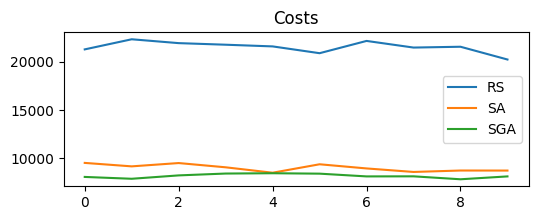

In [24]:
p_cost = [l[0] for l in rs_data]
p_cost_sa = [l[0] for l in sa_data]
best_objective_value = [l[0] for l in sga_data]
print(f'RS min cost: {min(p_cost)}')
print(f'SA min cost: {min(p_cost_sa)}')
print(f'SGA min cost: {min(best_objective_value)}')
plt.figure(figsize=(6, 2))
plt.plot(p_cost, label='RS')
plt.plot(p_cost_sa, label='SA')
plt.plot(best_objective_value, label='SGA')
plt.title('Costs')
plt.legend()
plt.show()

### c) plot the changes in the value of the objective function in successive iterations of the evolutionary algorithm, similar to the plot for simulated annealing,

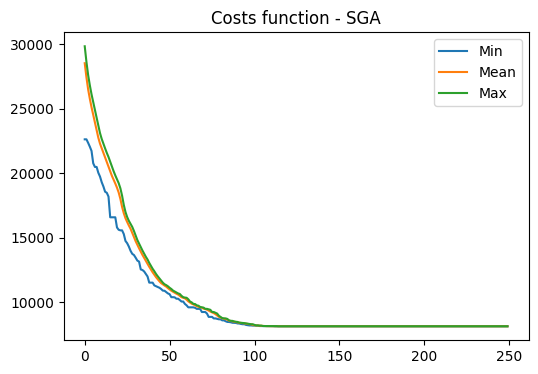

In [25]:
def plot_costs_v(cost_valuesm, title):
    plt.figure(figsize=(6, 4))
    plt.plot(cost_values)
    plt.title('Costs function - '+str(title))
    plt.legend(['Min', 'Mean', 'Max'], loc='upper right')
    plt.show()
plot_costs_v(cost_values,'SGA')

### d) instead of the Reverse Sequence Mutation, try a mutation involving the transposition of two randomly selected elements of a permutation

In [26]:
def random_mutation(p):
    rn = np.random.choice(len(p),2, False)
    i, j = rn.min(), rn.max()
    c_p = p.copy()
    c_p[i], c_p[j] = c_p[j], c_p[i]
    return c_p

  0     0.09864450 24341.95874369 28427.73810887 29755.65165154 1000.86451396
 20     1.41287398 16435.85025146 18578.24592357 19255.12452085 554.55793822
 40     2.63842463 11685.52568760 12107.41714165 12332.66246470 163.10388746
 60     3.81205487 10242.94482325 10680.86258874 10800.98828059 116.22372780
 80     4.96223688 9481.05761935 9580.96591144 9626.08732713  51.64428612
100     7.06427479 9210.75117950 9210.75117950 9210.75117950   0.00000000
120     9.22329879 9188.57543188 9188.57543188 9188.57543188   0.00000000
140    10.55031562 9188.57543188 9188.57543188 9188.57543188   0.00000000
160    11.70817685 9188.57543188 9188.57543188 9188.57543188   0.00000000
180    12.86677599 9188.57543188 9188.57543188 9188.57543188   0.00000000
200    14.00005960 9188.57543188 9188.57543188 9188.57543188   0.00000000
220    15.14987683 9188.57543188 9188.57543188 9188.57543188   0.00000000
240    16.29962206 9188.57543188 9188.57543188 9188.57543188   0.00000000


<Figure size 600x400 with 0 Axes>

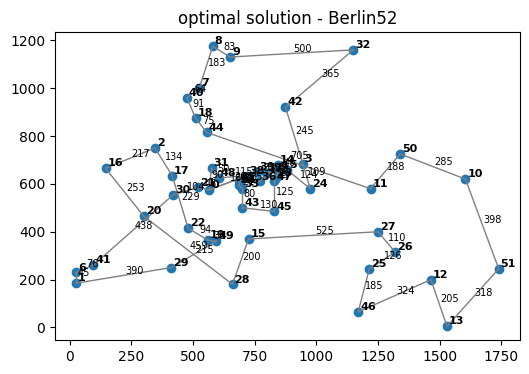

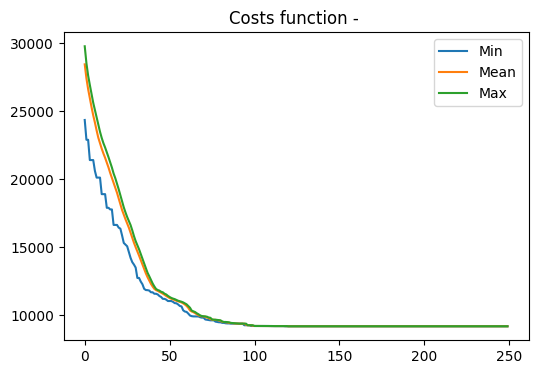

In [27]:
cost_values, _, _, current_population, _ = SGA(mutation=random_mutation, log = True)
plot_route('Berlin52',current_population[0])
plot_costs_v(cost_values,'')


### (d) check the performance of the algorithm on other instances of the comoving problem (at least bayg29, bays29, kroA100, kroA150, kroA200).

In [28]:
def parse_data(url):
    data = {
        'name': None,
        'n': None,
        'dist': None,
        'coords': None,
        'p': []
    }
    last_section = ""
    response = requests.get(url)
    lines = response.text.split('\n')
    for line in lines:
        elements = line.strip().split()
        section_type = elements[0]
        if section_type == 'NAME:':
            data['name'] = elements[1]
            last_section = section_type

        elif section_type.startswith("DIMENSION"):
            data['n'] = int(elements[-1])
            last_section = section_type

        elif section_type == "EDGE_WEIGHT_SECTION":
            last_section = section_type

        elif section_type in ["DISPLAY_DATA_SECTION", "NODE_COORD_SECTION"]:
            last_section = section_type

        elif section_type == "TOUR_SECTION" or section_type == "EOF":
            last_section = section_type
            if section_type == "EOF":
                break
        else:
            if last_section == "EDGE_WEIGHT_SECTION":
                elements = np.array(list(map(int, elements)))
                if len(elements) < 29:  # If the distance matrix is incomplete
                    elements = np.hstack((np.zeros(29 - len(elements)), elements))
                if 'dist' in data:
                    data['dist'] = np.vstack((data['dist'], elements)) if data['dist'] is not None else elements
                else:
                    data['dist'] = elements
            elif last_section in ["DISPLAY_DATA_SECTION", "NODE_COORD_SECTION"]:
                elements = list(map(float, elements[1:]))
                if 'coords' in data:
                    data['coords'] = np.vstack((data['coords'], np.array(elements))) if data['coords'] is not None else np.array(elements)
                else:
                    data['coords'] = np.array(elements)

            elif last_section == "TOUR_SECTION" and elements[0] != '-1':
                element = int(elements[0])
                data['p'].append(element - 1)
    return data

### bayg29

In [29]:
bayg29 = parse_data('https://github.com/pdrozdowski/TSPLib.Net/raw/master/TSPLIB95/tsp/bayg29.tsp')
bayg29_opt = parse_data('https://github.com/pdrozdowski/TSPLib.Net/raw/master/TSPLIB95/tsp/bayg29.opt.tour')

In [30]:
bayg29_dist = bayg29['dist']
n = bayg29['n']
p = bayg29_opt['p']
coords = bayg29['coords']

A = np.vstack((bayg29_dist, np.zeros(n)))
A += A.T
print()

  0     0.07696867 3508.00000000 4424.58900000 4703.00000000 217.95964323
 20     1.02424431 2344.00000000 2748.54300000 2863.00000000  91.83631172
 40     2.45269799 1670.00000000 1770.11300000 1809.00000000  27.11280566
 60     4.01187944 1670.00000000 1670.00000000 1670.00000000   0.00000000


<Figure size 600x400 with 0 Axes>

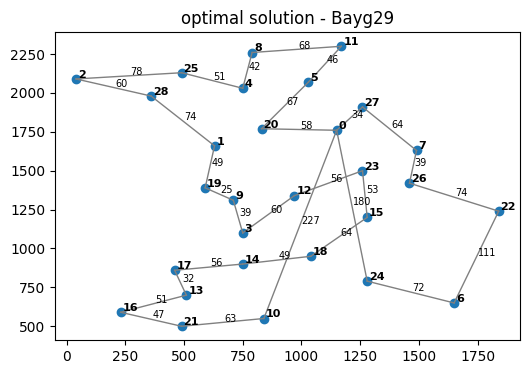

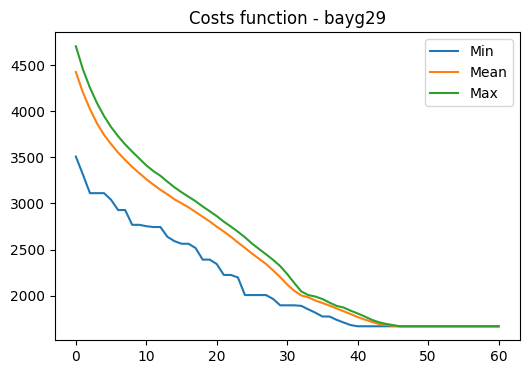

In [31]:
cost_values, best_objective_value, best_chromosom, current_population, time_SGA= SGA(
    dist_matrix=A,chromosome_length=n ,log=True)
plot_route('Bayg29',current_population[0])
plot_costs_v(cost_values,'bayg29')

### bays29

In [32]:
bays29 = parse_data('https://github.com/pdrozdowski/TSPLib.Net/raw/master/TSPLIB95/tsp/bays29.tsp')
bays29_opt = parse_data('https://github.com/pdrozdowski/TSPLib.Net/raw/master/TSPLIB95/tsp/bays29.opt.tour')

In [33]:
A = bays29['dist']
n = bays29['n']
p = bays29_opt['p']
coords = bays29['coords']

  0     0.33989263 4591.00000000 5590.42200000 5928.00000000 260.67835337
 20     1.41845727 2874.00000000 3415.07300000 3598.00000000 141.15389357
 40     2.37838936 2107.00000000 2211.08500000 2245.00000000  33.97557615
 60     3.30719018 2033.00000000 2033.00000000 2033.00000000   0.00000000


<Figure size 600x400 with 0 Axes>

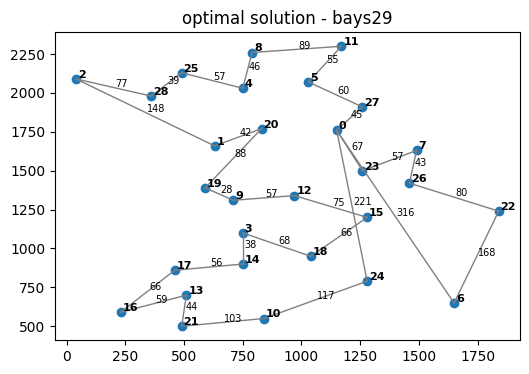

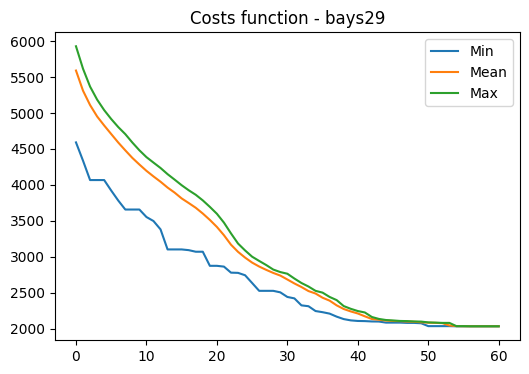

In [34]:
cost_values, best_objective_value, best_chromosom, current_population, time_SGA= SGA(dist_matrix=A,chromosome_length=n ,log=True)
plot_route('bays29', current_population[0])
plot_costs_v(cost_values,'bays29')

### kroA100

In [35]:
kroA100 = parse_data("https://github.com/pdrozdowski/TSPLib.Net/raw/master/TSPLIB95/tsp/kroA100.tsp")
kroA100_opt = parse_data('https://github.com/pdrozdowski/TSPLib.Net/raw/master/TSPLIB95/tsp/kroA100.opt.tour')

In [36]:
n = kroA100['n']
coords = kroA100['coords']
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())

p = kroA100_opt['p']

  0     0.16441584 141790.30968989 163939.16242854 170540.19205180 5177.03183933
 20     2.25702310 101785.58555765 109802.09416269 112238.97735304 1690.99614404
 40     4.45040941 79688.02859292 84701.04988002 86208.80754575 1268.97235884
 60     8.18206978 64219.35187628 68115.33225450 69349.01911247 942.82975866
 80    10.18356705 54715.30404615 56734.05841448 57112.04854469 521.63333616
100    12.08125591 48040.91529335 49492.72055735 49999.12577974 363.93842687
120    13.94967246 43138.90845285 44330.22947976 44649.03219238 248.71224036
140    15.82248116 39297.52629948 40213.68762865 40697.45251034 337.27149395
160    17.68606806 35356.63094035 35982.79816953 36070.90689352 128.99598536
180    20.64014673 31957.38708528 32547.06015604 32848.28456603 206.95485819
200    23.59922957 28962.18346434 29524.85788551 29686.54783600 125.31686688
220    25.44590592 27476.62080963 27862.30935415 27940.43898423 101.90464807
240    27.27056384 25728.06122236 26162.86371020 26244.48294968  50

<Figure size 600x400 with 0 Axes>

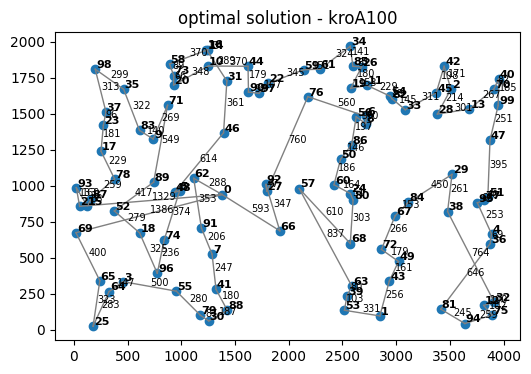

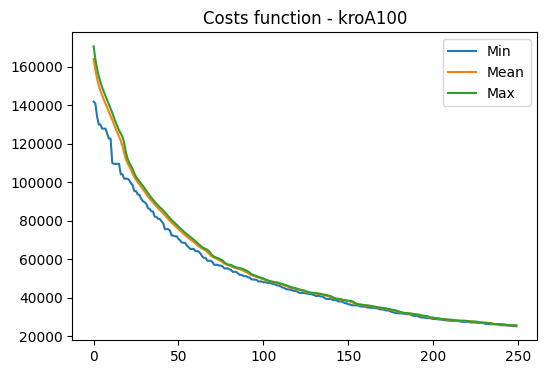

In [37]:
cost_values, best_objective_value, best_chromosom, current_population, time_SGA= SGA(dist_matrix=A,chromosome_length=n ,log=True)
plot_route('kroA100',current_population[0])
plot_costs_v(cost_values,'kroA100')

### kroA150

In [38]:
kroA150 = parse_data("https://github.com/pdrozdowski/TSPLib.Net/raw/master/TSPLIB95/tsp/kroA150.tsp")

In [39]:
n = kroA150['n']
coords = kroA150['coords']
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())

  0     0.23569798 218997.76860207 247806.58214739 256125.12572839 6240.60849437
 20     3.16343665 173673.22438763 185868.17537319 189090.66201517 2466.10763159
 40     8.09162331 139035.42126754 148131.52197747 151150.11645494 2332.18653010
 60    12.59089875 119375.75799870 124005.01131663 125600.48398150 1236.94889554
 80    15.16505647 102204.82906626 106599.50919460 107688.86497237 847.25462261
100    17.81148624 91326.42382220 94068.92493502 94829.26943374 592.93460332
120    22.63253021 81217.92070260 82723.33163666 83334.39270558 478.29837806
140    25.17260742 72657.00586218 74974.89818974 75486.90807785 449.57815152
160    27.74622393 67253.84313923 68534.77083111 68959.26306359 266.75681707
180    30.28235435 60508.83421454 62347.36692736 62790.21109381 408.82079727
200    33.05777264 54511.17461181 55492.42333469 55616.68000135 219.23573973
220    38.67736959 47936.01789945 49327.02821542 50450.56637948 541.78491850
240    41.53368545 44140.36639474 45119.15356569 45408.80

<Figure size 600x400 with 0 Axes>

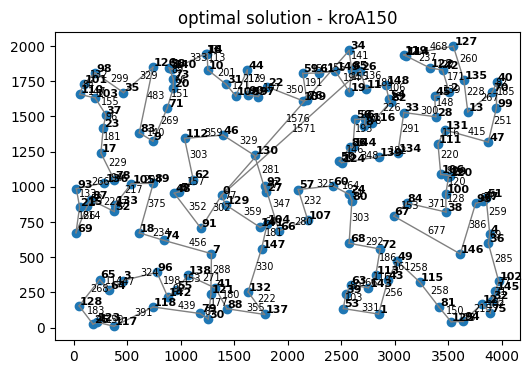

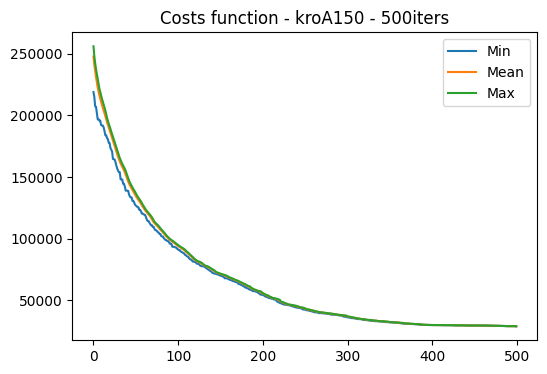

In [40]:
cost_values, best_objective_value, best_chromosom, current_population, time_SGA= SGA(
    dist_matrix=A,chromosome_length=n ,number_of_iterations = 500, log=True)
plot_route('kroA150',current_population[0])
plot_costs_v(cost_values,'kroA150 - 500iters')

### kroA200

In [41]:
kroA200 = parse_data("https://github.com/pdrozdowski/TSPLib.Net/raw/master/TSPLIB95/tsp/kroA200.tsp")

In [42]:
n = kroA200['n']
coords = kroA200['coords']
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())

  0     0.31142783 299451.05421363 329702.42678238 339536.51168792 7246.82163224
 20     4.03533912 240887.79211911 257451.29881740 261545.05174538 3360.89195676
 40     7.60383797 214784.79697334 226652.22901483 230010.68915984 2565.16533463
 60    13.29730392 185702.05968078 192963.89081413 195202.91158461 1818.52839373
 80    16.59072685 161187.51974058 168156.27715448 169731.25327536 1262.47245019
100    19.89032698 142674.29517447 147778.12996099 149536.97721267 1266.40288531
120    23.17464185 126573.35292721 129579.78100651 130852.55985265 857.96937529
140    28.69875836 115134.25082519 118273.86913296 119162.06772127 742.90343579
160    31.92671537 101294.65291446 104959.97123159 105634.94728646 612.72106554
180    35.14205503 94305.34245610 95637.57537924 96179.42113623 415.64674966
200    38.89836740 86623.97665349 88211.27848579 88674.68347907 382.36142782
220    43.80254579 80447.94272317 81224.75776370 81576.13270942 288.07631176
240    47.00858808 75203.04432804 76238.736

<Figure size 600x400 with 0 Axes>

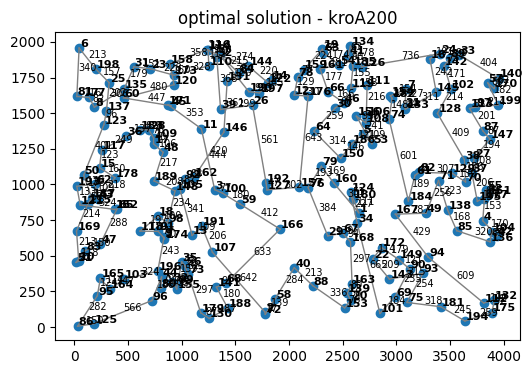

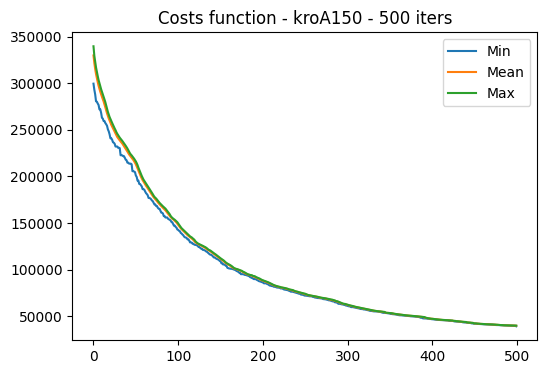

In [43]:
cost_values, best_objective_value, best_chromosom, current_population, time_SGA= SGA(dist_matrix=A,chromosome_length=n ,number_of_iterations = 500, log=True)
plot_route('kroA200',current_population[0])
plot_costs_v(cost_values,'kroA150 - 500 iters')

# P2

Extend the evolutionary algorithm by adding or changing the crossover and mutation operators (according to your own ideas, you can also check the popular operators OX, CX, PBX, OBX, PPX, LCSX, LOX in the literature on the subject). Analyse the performance of the new algorithm and the results obtained.

In [44]:
# BERLIN52
n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
# print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
# print('Optimal solution:\n', p)

Problem size: 52


https://github.com/DEAP/deap/tree/master/deap/tools

In [45]:
def OX(ind1, ind2):
    size = min(len(ind1), len(ind2))
    a, b = random.sample(range(size), 2)
    if a > b:
        a, b = b, a

    holes1, holes2 = [True] * size, [True] * size
    for i in range(size):
        if i < a or i > b:
            holes1[ind2[i]] = False
            holes2[ind1[i]] = False

    temp1, temp2 = ind1, ind2
    k1, k2 = b + 1, b + 1
    for i in range(size):
        if not holes1[temp1[(i + b + 1) % size]]:
            ind1[k1 % size] = temp1[(i + b + 1) % size]
            k1 += 1

        if not holes2[temp2[(i + b + 1) % size]]:
            ind2[k2 % size] = temp2[(i + b + 1) % size]
            k2 += 1
    for i in range(a, b + 1):
        ind1[i], ind2[i] = ind2[i], ind1[i]

    return ind1, ind2

In [46]:
def CX(ind1, ind2):
    d1 = {ind1[k] : k for k in range(len(ind1))}
    child1 = list(range(len(ind1)))
    child2 = list(range(len(ind2)))
    elements = set()

    parent = -1
    for i in range(len(ind1)):
        if ind1[i] not in elements:
            parent *= -1
            idx = i
            first = True
            while idx != i or first:
                first = False
                elements.add(ind1[idx])
                if parent == 1:
                    child1[idx] = ind1[idx]
                    child2[idx] = ind2[idx]
                else:
                    child1[idx] = ind2[idx]
                    child2[idx] = ind1[idx]
                idx = d1[ind2[idx]]
    return child1, child2

In [47]:
def PBX(ind1, ind2):
    n = len(ind1)
    r1 = np.random.rand(n)
    r2 = np.random.rand(n)
    chld1 = [-1] * n
    chld2 = [-1] * n
    for i in range(n):
        if (r1 < 0.5)[i]:
            chld1[i] = ind1[i]
        if (r2 < 0.5)[i]:
            chld2[i] = ind2[i]

    used1 = set(ind1[r1 < 0.5])
    used2 = set(ind2[r2 < 0.5])

    un_used1 = [x for x in ind2 if x not in used1][::-1]
    un_used2 = [x for x in ind1 if x not in used2][::-1]

    for i in range(n):
        if chld1[i] == -1:
            chld1[i] = un_used1.pop()

        if chld2[i] == -1:
            chld2[i] = un_used2.pop()
    return chld1, chld2

In [48]:
crossovers = [OX, CX, PBX]

<Figure size 600x400 with 0 Axes>

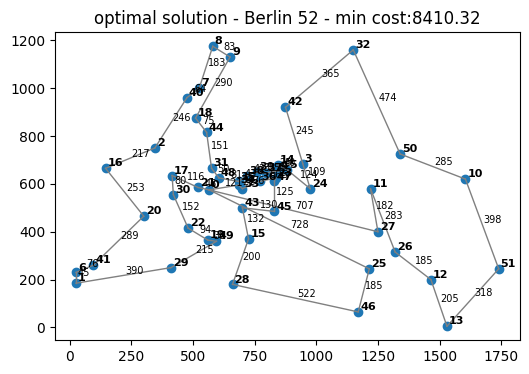

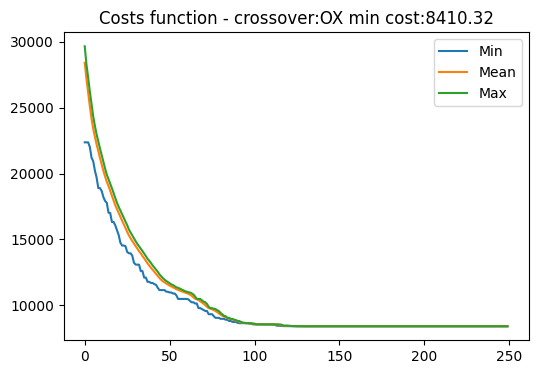

<Figure size 600x400 with 0 Axes>

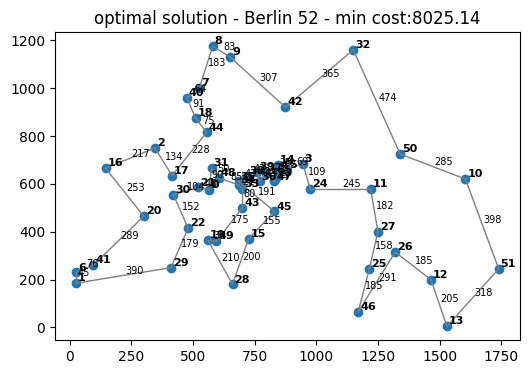

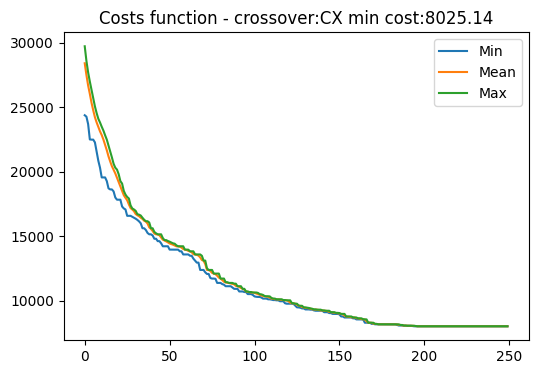

<Figure size 600x400 with 0 Axes>

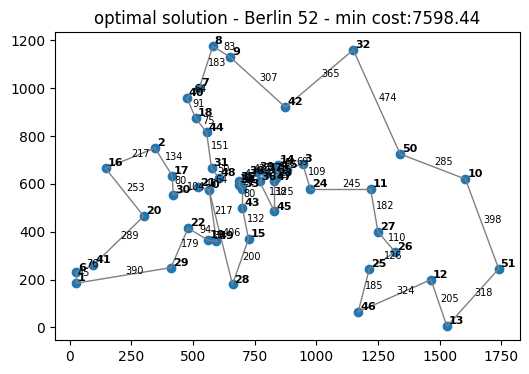

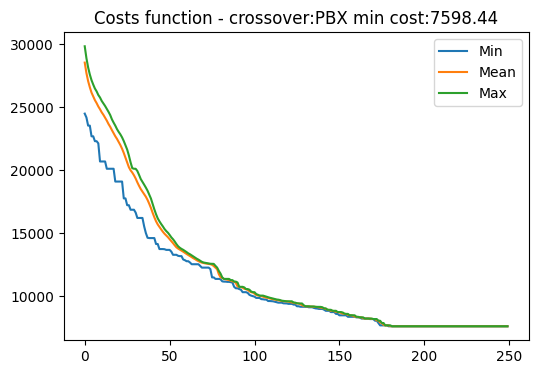

In [49]:
for i in crossovers:
    cost_values, best_objective_value, best_chromosom, current_population, time_SGA= SGA(
        population_size=500, mutation_probability=0.2, crossover=i, log=False)
    min_cost = str(format(cost_values[-1][-1],'.2f'))
    plot_route('Berlin 52 - min cost:'+min_cost,current_population[0])
    plot_costs_v(cost_values,'crossover:'+ i.__name__ + ' min cost:' +min_cost)

# P3
Try to improve the evolutionary algorithm from Task 1 by introducing an additional mutation consisting in a local search (for a given initial permutation, we check all permutations differing from it at no more than K positions and the initial permutation initial permutation is replaced by the best one found) and iterated local search (for a given initial permutation, we check all permutations differing from it at permutation at no more than K positions, replace the initial permutation with the best one found and we repeat the procedure as long as the solution can be improved).

In [73]:
bays29 = parse_data('https://github.com/pdrozdowski/TSPLib.Net/raw/master/TSPLIB95/tsp/bays29.tsp')
bays29_opt = parse_data('https://github.com/pdrozdowski/TSPLib.Net/raw/master/TSPLIB95/tsp/bays29.opt.tour')
A = bays29['dist']
n = bays29['n']
p = bays29_opt['p']
coords = bays29['coords']

In [74]:
def tsp_objective_function_ls(p, A):
    s = 0.0
    n = len(p)
    for i in range(n):
        s += A[p[(i-1) % n], p[i]]
    return s

In [75]:
def ls_mutation(p):
    permutations = [p]
    for i in range(len(p)):
        for j in range(i+1,len(p)):
                q = p.copy()
                q[i], q[j] = q[j], q[i]
                permutations.append(q)
    p_s = [(tsp_objective_function_ls(s, A), s) for s in permutations]
    min_index = min(range(len(p_s)), key=lambda i: p_s[i][0])
    return p_s[min_index][1]

In [76]:
def SGA(
    population_size = 1000,
    chromosome_length = n,
    crossover_probability = 0.95,
    mutation_probability = 0.25,
    number_of_iterations = 250,
    mutation = reverse_sequence_mutation,
    dist_matrix = A,
    objective_function = tsp_objective_function,
    crossover = PMX,
    log = False,
    optimal_solution = None
):
    time0 = time.time()
    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    number_of_offspring = population_size

    cost_values = []

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = objective_function(current_population[i, :], dist_matrix)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = crossover(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = mutation(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = objective_function(children_population[i, :], dist_matrix)

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        cost_values.append([objective_values.min(), objective_values.mean(), objective_values.max()])
        if best_objective_value > objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]
        time_SGA = time.time() - time0
        if t%20==0 and log==True:
            print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
            if objective_values.std() == 0:
              return cost_values, best_objective_value, best_chromosome, current_population, time_SGA
            if optimal_solution == objective_values.min():
              return cost_values, best_objective_value, best_chromosome, current_population, time_SGA
    return cost_values, best_objective_value, best_chromosome, current_population, time_SGA

In [77]:
def ls_mutation_iter(p):
    curr_score = tsp_objective_function_ls(p,A)
    curr_best = p
    candidate = ls_mutation(p)
    s = tsp_objective_function_ls(candidate, A)
    while s < curr_score:
        curr_score, curr_best = s, candidate
        candidate = ls_mutation(curr_best)
        s = tsp_objective_function_ls(candidate, A)
    return curr_best

<Figure size 600x400 with 0 Axes>

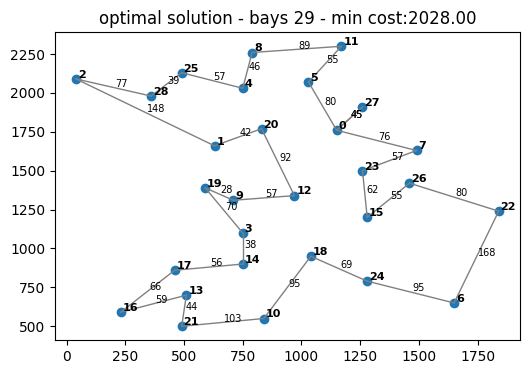

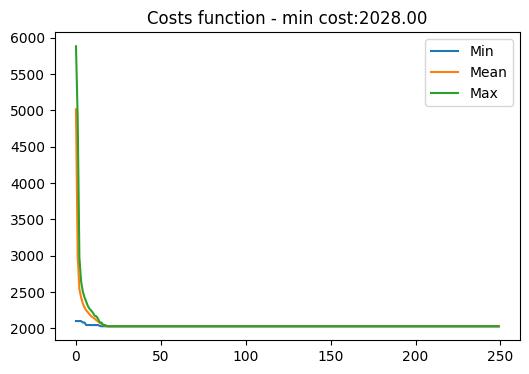

In [78]:
cost_values, best_objective_value, best_chromosom, current_population, time_SGA= SGA(
    population_size=250,
    crossover_probability= 0.95,
    mutation_probability=0.2,
    number_of_iterations= 250,
    mutation = ls_mutation_iter,
    objective_function = tsp_objective_function_ls,
    log=False)
min_cost = str(format(cost_values[-1][-1],'.2f')) # on task1 was 2026
plot_route('bays 29 - min cost:'+min_cost,current_population[0])
plot_costs_v(cost_values, 'min cost:' +min_cost)

# p4
Use the implemented algorithm to solve the QAP problem. Use test data from the QAPLIB library. Perform calculations for at least the following data sets: Nug12, Nug14, ... Nug30, Tai50a, Tai60a, Tai80a. Analyze the operation of the algorithm and the results obtained.

In [79]:
import urllib.request

In [80]:
def get_nug(no, tai = False):
    if tai == True:
        QAP_INSTANCE_URL = f'https://coral.ise.lehigh.edu/wp-content/uploads/2014/07/data.d/{no}.dat'
    else:
        QAP_INSTANCE_URL = f'https://qaplib.mgi.polymtl.ca/data.d/nug{no}.dat'
    qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)

    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
    # print('Problem size: %d' % n)

    A = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        if len(line) < 2:
            continue
        A[i, :] = list(map(int, line.decode()[:-1].split()))
    # print('Flow matrix:\n', A)

    B = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        if len(line) < 2:
            continue
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    # print('Distance matrix:\n', B)

    return n, A, B

In [81]:
def qap_objective_function(p,A):
    n = len(p)
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p, p[i]]).sum()
    return s

  0     0.13230681 656.00000000 768.22600000 808.00000000  29.01931984
 20     1.82782984 582.00000000 582.00000000 582.00000000   0.00000000


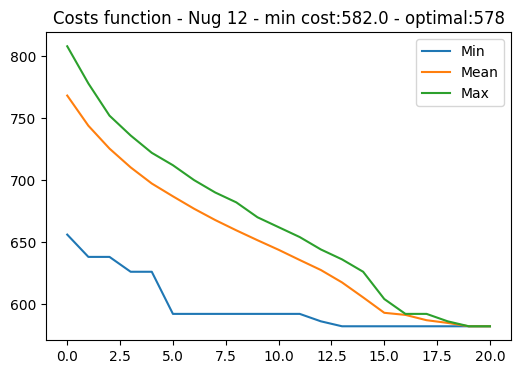

  0     0.16378236 1164.00000000 1306.66800000 1358.00000000  36.94538910
 20     1.96464562 1028.00000000 1029.78800000 1030.00000000   0.61567524
 40     3.81850982 1028.00000000 1028.00000000 1028.00000000   0.00000000


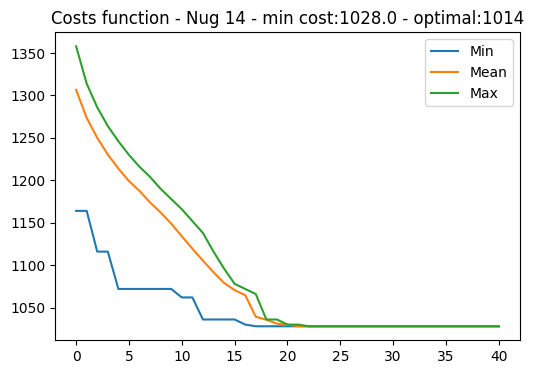

  0     0.18338537 1358.00000000 1522.56000000 1582.00000000  44.55736078
 20     2.16028571 1152.00000000 1152.00000000 1152.00000000   0.00000000


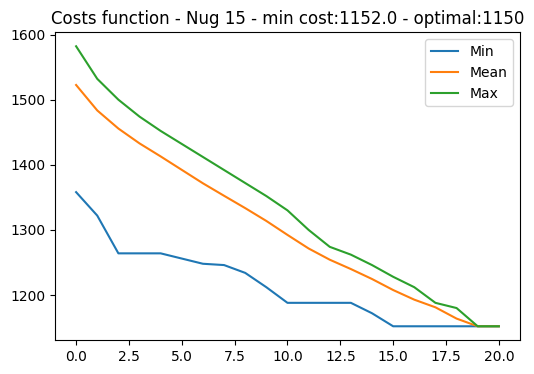

  0     0.20995307 1854.00000000 2071.45000000 2142.00000000  51.88893427
 20     3.78301930 1676.00000000 1732.40000000 1760.00000000  17.18115246
 40     6.21475244 1642.00000000 1642.00000000 1642.00000000   0.00000000


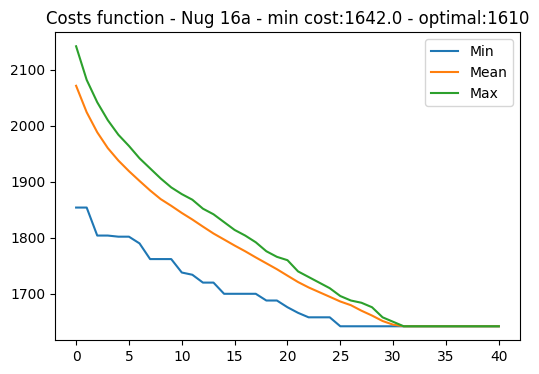

  0     0.20577168 1488.00000000 1657.25800000 1722.00000000  47.31162052
 20     2.31617570 1268.00000000 1280.78600000 1300.00000000   9.66365376
 40     4.46176648 1262.00000000 1262.00000000 1262.00000000   0.00000000


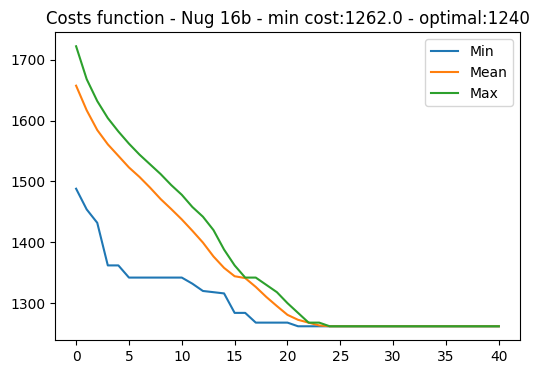

  0     0.20075226 1986.00000000 2236.21800000 2312.00000000  58.13601703
 20     2.52566481 1810.00000000 1845.81600000 1862.00000000   9.78152054
 40     5.76446581 1790.00000000 1790.00000000 1790.00000000   0.00000000


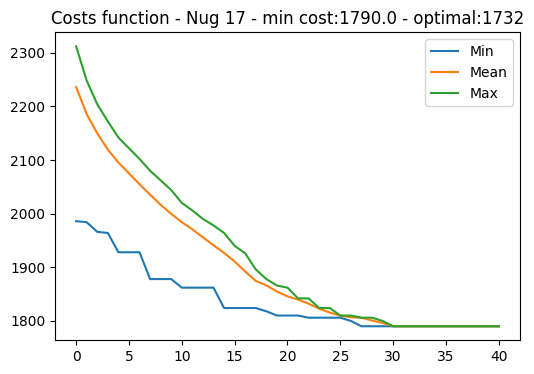

  0     0.34470916 2206.00000000 2480.17400000 2556.00000000  57.94319394
 20     3.09276414 1994.00000000 2083.58400000 2106.00000000  23.56121695
 40     5.39814901 1960.00000000 1960.00000000 1960.00000000   0.00000000


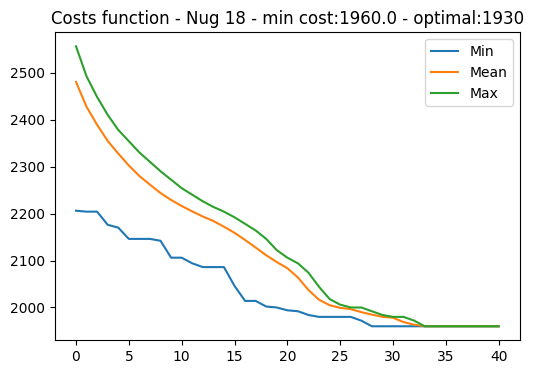

  0     0.22957993 2980.00000000 3305.20800000 3398.00000000  71.33726050
 20     2.80481935 2696.00000000 2827.73400000 2856.00000000  27.76208285
 40     5.92901063 2658.00000000 2658.00000000 2658.00000000   0.00000000


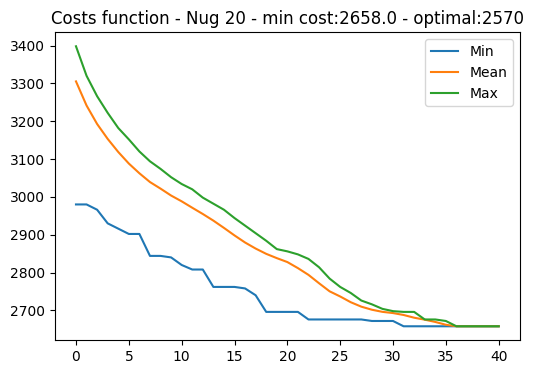

  0     0.21422386 2824.00000000 3291.16400000 3400.00000000  87.04176643
 20     2.73488426 2556.00000000 2594.51600000 2604.00000000   9.51954537
 40     5.33525252 2556.00000000 2556.00000000 2556.00000000   0.00000000


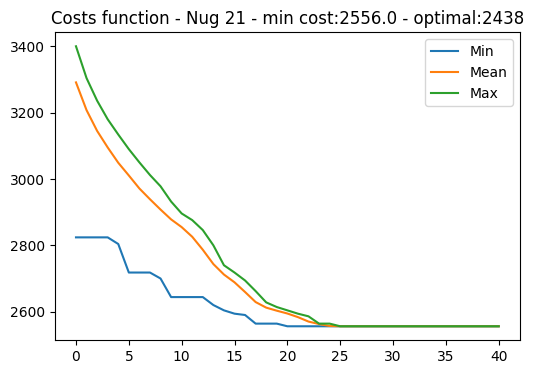

  0     0.23449183 4346.00000000 4939.24800000 5128.00000000 140.36313795
 20     3.00613093 3804.00000000 3916.72000000 3960.00000000  29.65443643
 40     7.03640819 3696.00000000 3700.82600000 3706.00000000   2.58180634
 60    10.12122202 3696.00000000 3696.00000000 3696.00000000   0.00000000


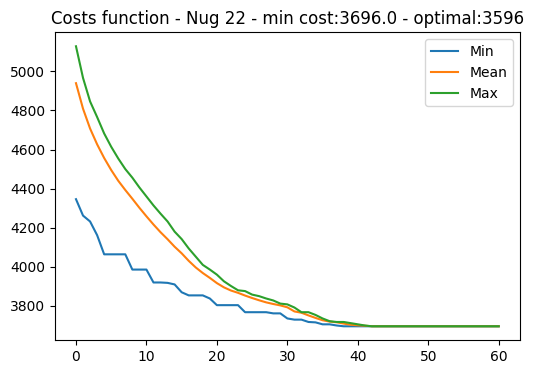

  0     0.25439119 4238.00000000 4624.93000000 4746.00000000  95.31003672
 20     3.20905519 3866.00000000 4020.26000000 4070.00000000  36.63905566
 40     6.17355943 3644.00000000 3652.65600000 3656.00000000   4.34069856
 60    10.06715775 3620.00000000 3620.00000000 3620.00000000   0.00000000


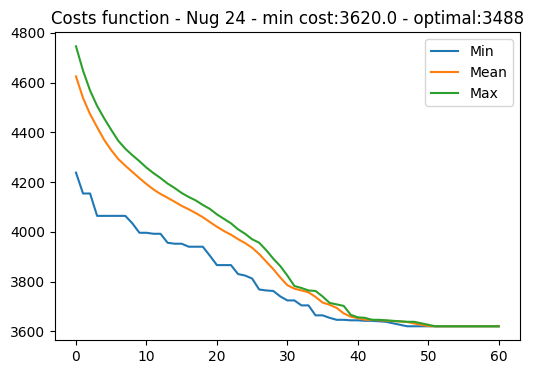

  0     0.27785373 4488.00000000 4859.49200000 4984.00000000  93.60738185
 20     3.30540705 4076.00000000 4195.47400000 4234.00000000  25.65820189
 40     6.26769376 3838.00000000 3844.86400000 3850.00000000   5.80667754
 60     9.51893449 3838.00000000 3838.00000000 3838.00000000   0.00000000


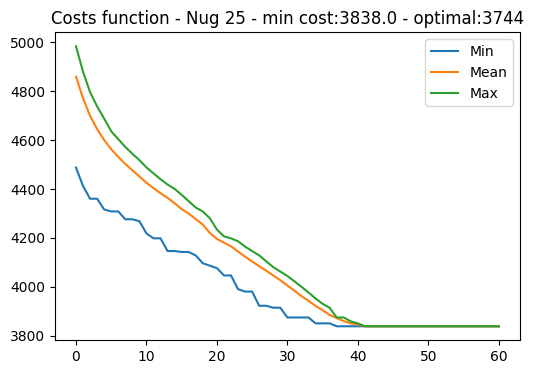

  0     0.28145170 6354.00000000 6912.12000000 7092.00000000 137.40850629
 20     3.40444851 5582.00000000 5728.95400000 5762.00000000  25.11409732
 40     6.67583084 5432.00000000 5432.00000000 5432.00000000   0.00000000


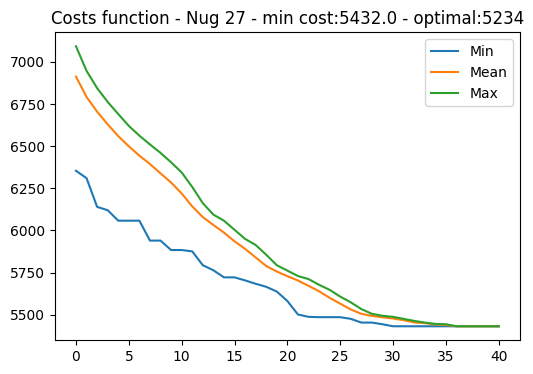

  0     0.29646325 6272.00000000 6755.54800000 6918.00000000 123.60522520
 20     4.27993774 5752.00000000 5931.69600000 6004.00000000  52.79397299
 40     8.74742699 5438.00000000 5506.34800000 5522.00000000  16.33740787
 60    12.14883733 5430.00000000 5430.00000000 5430.00000000   0.00000000


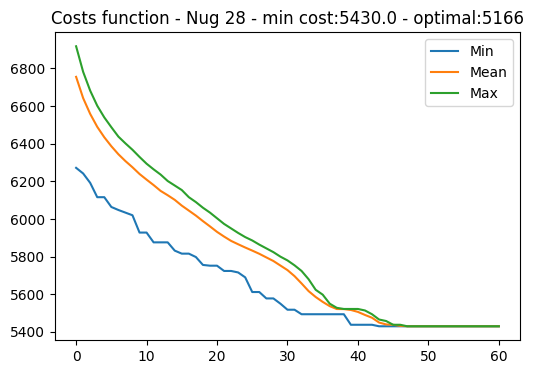

ValueError: ignored

In [82]:
instances = [12,14, 15, '16a' ,'16b', 17, 18, 20, 21, 22, 24, 25, 27, 28, 30]
optimal_solutions = [578, 1014, 1150, 1610 , 1240, 1732, 1930, 2570, 2438, 3596, 3488, 3744, 5234, 5166, 6124]
for i in range(len(instances)):
    n,A,B = get_nug(instances[i])
    cost_values, best_objective_value, best_chromosom, current_population, time_SGA= SGA(
    crossover= PMX,
    objective_function= qap_objective_function,
    crossover_probability = 0.9,
    chromosome_length = n,
    dist_matrix= A,
    number_of_iterations = 250,
    log=True,
    optimal_solution=optimal_solutions[i])
    min_cost = cost_values[-1][-1]
    plot_costs_v(cost_values, f'Nug {str(instances[i])} - min cost:{min_cost} - optimal:{optimal_solutions[i]}')

###  Tai50a, Tai60a, Tai80a

  0     0.54091501 5391648.00000000 5512580.68000000 5548754.00000000 27413.15041209
 20     7.60117197 5269905.00000000 5339866.20400000 5359440.00000000 14785.76882189
 40    13.79921770 5141364.00000000 5171051.76500000 5175753.00000000 4717.31336269
 60    19.46675730 5116337.00000000 5116337.00000000 5116337.00000000   0.00000000


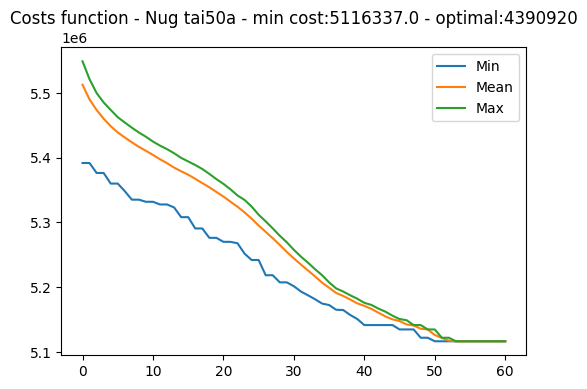

<ipython-input-81-d4f5b28a60d9>:5: RuntimeWarning: overflow encountered in multiply
  s += (A[i, :] * B[p, p[i]]).sum()
<ipython-input-81-d4f5b28a60d9>:5: RuntimeWarning: invalid value encountered in multiply
  s += (A[i, :] * B[p, p[i]]).sum()


  0     1.38812375          nan          nan          nan          nan


<ipython-input-76-fdf3872b2c59>:34: RuntimeWarning: invalid value encountered in subtract
  fitness_values = objective_values.max() - objective_values
<ipython-input-81-d4f5b28a60d9>:5: RuntimeWarning: overflow encountered in double_scalars
  s += (A[i, :] * B[p, p[i]]).sum()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


 20    11.05337000         -inf         -inf         -inf          nan
 40    21.50214386         -inf         -inf         -inf          nan
 60    31.55919790         -inf         -inf         -inf          nan
 80    40.38983178         -inf         -inf         -inf          nan
100    50.89727521         -inf         -inf         -inf          nan
120    61.14870858         -inf         -inf         -inf          nan
140    69.73470592         -inf         -inf         -inf          nan
160    80.05987978         -inf         -inf         -inf          nan
180    90.53563952         -inf         -inf         -inf          nan
200    99.08212686         -inf         -inf         -inf          nan
220   109.52175856         -inf         -inf         -inf          nan
240   119.95423913         -inf         -inf         -inf          nan


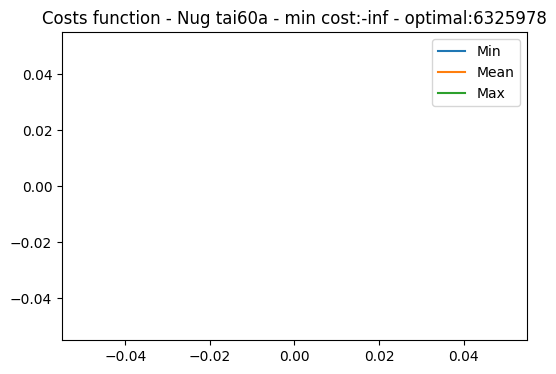

  0     0.94757080 163554885691794657669853301096223584095767533615696096884332294383520080994799578070132737729298046251685599488248978589212349527833698949379958523646881075635527291118398283374867858596741272028796573751374552545120825134986812539985711183111082794026977738037379651862528.00000000 2921678570987156661266612639631958427098859909652789614605933911703908400926288375309569178256644508490815626855252908910155683964149591453816331738071565951742490037821123021137981819687212137917167429389257485275522503097814487284583908739801734524586672245950176978534400.00000000 5557130505921672456798570572293481478908489046010299028642569606981214352862521346373283420783527139211785905475859785536663640700747483336070642616287714953560993185667489902821754890548687600837876010658057351370050426763811765632652069877940629971208314888811334518964224.00000000          inf
 20    12.23868513 72144361812494630185380087531717645772070171533595825154841876768150809649462162335392832745831728

In [ ]:
instances = ['tai50a', 'tai60a', 'tai80a']
optimal_solutions = [4390920, 6325978, 11657010]
for i in range(len(instances)):
    n,A,B = get_nug(instances[i], tai = True)
    cost_values, best_objective_value, best_chromosom, current_population, time_SGA= SGA(
    crossover= PMX,
    objective_function= qap_objective_function,
    chromosome_length = n,
    dist_matrix= A,
    number_of_iterations = 250,
    log=True)
    min_cost = cost_values[-1][-1]
    plot_costs_v(cost_values, f'Nug {str(instances[i])} - min cost:{min_cost} - optimal:{optimal_solutions[i]}')